In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Downloading Stocks for Apple, Microsoft, Google and Amazon of the last 3 years

In [9]:
# Defining list of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

# Downloading historical daily prices over last 3 years (adjusted close prices)
data = yf.download(tickers, start='2021-01-01', end='2024-12-12')['Adj Close']

data.head(10)

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-04,126.544212,159.331497,86.102631,210.423111
2021-01-05,128.108810,160.925507,86.734360,210.626053
2021-01-06,123.796440,156.919006,86.453857,205.164673
2021-01-07,128.020752,158.108002,89.042564,211.003067
2021-01-08,129.125748,159.134995,90.036987,212.288696
2021-01-11,126.123718,155.710495,88.019730,210.229797
2021-01-12,125.947746,156.041504,87.014854,207.755219
2021-01-13,127.991455,158.294495,87.405945,209.118179
2021-01-14,126.055290,156.373505,86.697487,205.909012


### Plotting Stock Prices

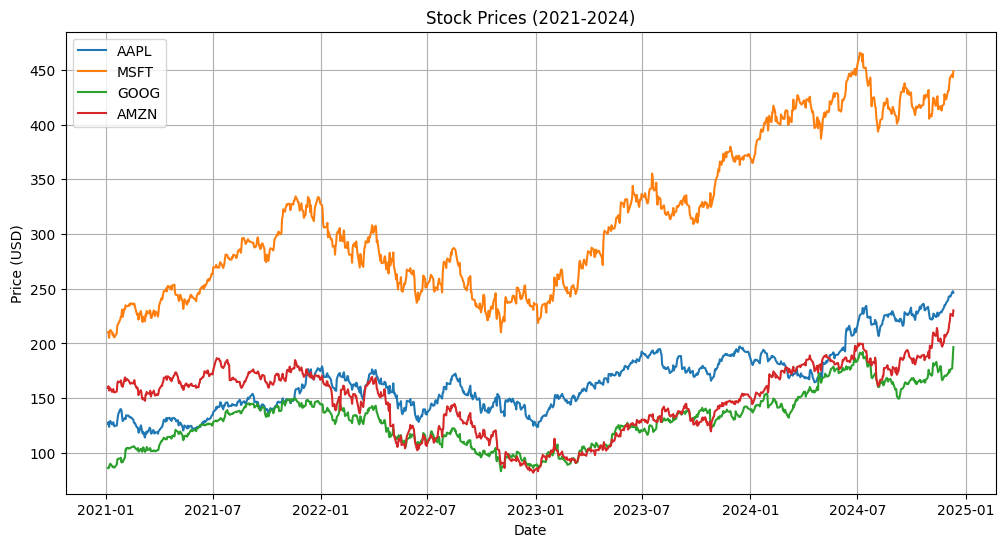

In [3]:
# Plotting the adjusted closing prices
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Stock Prices (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
data[ticker].head(10)

Date
2021-01-04    159.331497
2021-01-05    160.925507
2021-01-06    156.919006
2021-01-07    158.108002
2021-01-08    159.134995
2021-01-11    155.710495
2021-01-12    156.041504
2021-01-13    158.294495
2021-01-14    156.373505
2021-01-15    155.212494
Name: AMZN, dtype: float64

### Calculating Daily Returns

In [5]:
# Calculating Daily Returns
daily_returns = data.pct_change()

daily_returns.head(10)

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.007337,0.000964
2021-01-06,-0.033662,-0.024897,-0.003234,-0.025929
2021-01-07,0.034123,0.007577,0.029943,0.028457
2021-01-08,0.008631,0.006496,0.011168,0.006093
2021-01-11,-0.023249,-0.021519,-0.022405,-0.009699
2021-01-12,-0.001395,0.002126,-0.011416,-0.011771
2021-01-13,0.016227,0.014438,0.004495,0.006560
2021-01-14,-0.015127,-0.012136,-0.008105,-0.015346


### Calculating Annual Returns

In [6]:
# Calculating mean daily returns for each stock
mean_daily_returns = daily_returns.mean()

# Calculating annual returns (assuming 252 trading days per year)
annual_returns = mean_daily_returns * 252

print('Annual returns')
annual_returns

Annual returns


Ticker
AAPL    0.205119
AMZN    0.156214
GOOG    0.257487
MSFT    0.226899
dtype: float64

### Visualize daily returns distribution

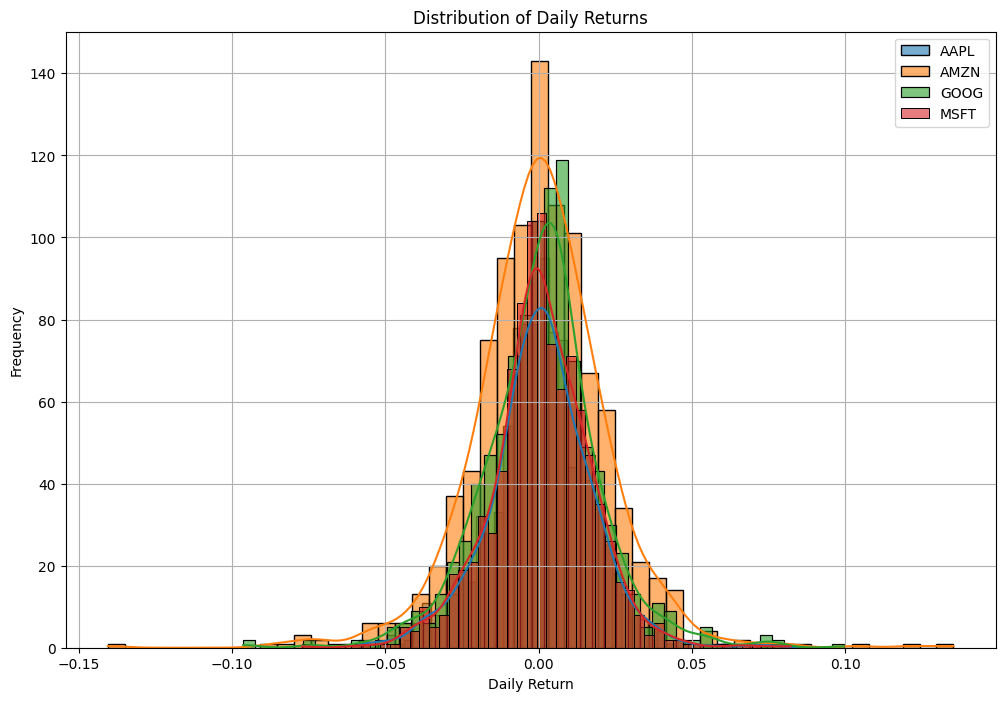

In [10]:
import seaborn as sns

# Plotting histograms for daily returns
plt.figure(figsize=(12,8))

for ticker in daily_returns.columns:
    sns.histplot(daily_returns[ticker].dropna(), bins=50, kde=True, label=ticker, alpha=0.6)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Calculating Risk Metrics

In [11]:
# Calculating daily and annual volatility
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

# Calculating annualised covariance matrix
cov_matrix = daily_returns.cov() * 252

# Calculating correlation matrix
corr_matrix = daily_returns.corr()

# Print results
print("Annual Volatility (Standard Deviation):")
print(annual_volatility)

print("\nCovariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(corr_matrix)

Annual Volatility (Standard Deviation):
Ticker
AAPL    0.266917
AMZN    0.353824
GOOG    0.307751
MSFT    0.261321
dtype: float64

Covariance Matrix:
Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    0.071245  0.052967  0.049580  0.047430
AMZN    0.052967  0.125191  0.069771  0.061841
GOOG    0.049580  0.069771  0.094711  0.056095
MSFT    0.047430  0.061841  0.056095  0.068289

Correlation Matrix:
Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    1.000000  0.560840  0.603570  0.679992
AMZN    0.560840  1.000000  0.640748  0.668827
GOOG    0.603570  0.640748  1.000000  0.697511
MSFT    0.679992  0.668827  0.697511  1.000000


### Visualising Correlation as heatmap

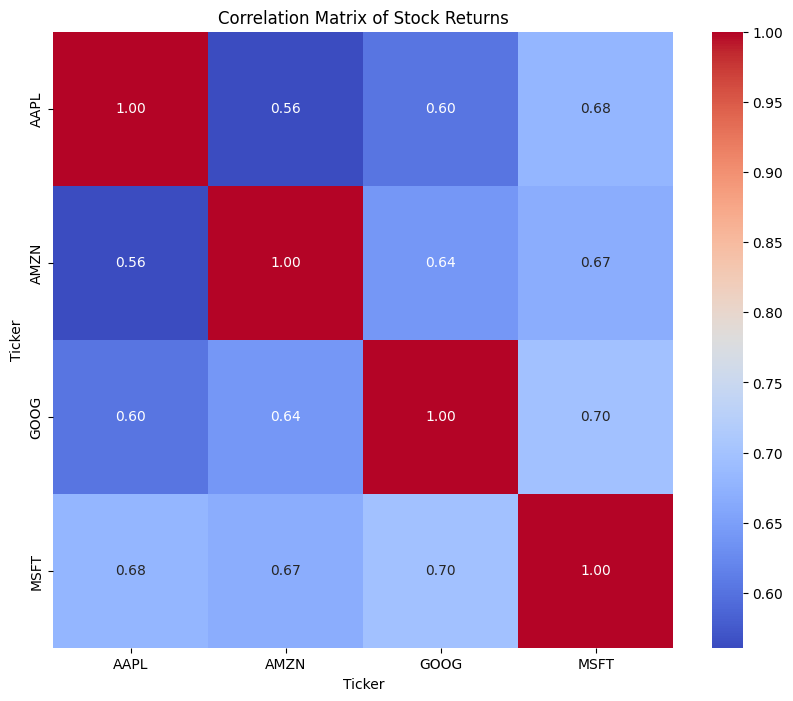

In [29]:
# Plotting Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Stock Returns')
plt.savefig('correlation_heatmap.png')
plt.show()

## Evaluating Expected Portfolio Risk and Return

### Calculating Expected Portfolio Return

In [16]:
# Defining portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Calculating portfolio expected return
portfolio_return = np.dot(weights, annual_returns)
print("Expected return:", portfolio_return)

Expected return: 0.2114295405834713


### Calculating Expected Portfolio Risk

In [17]:
# Calculating portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Calculating portfolio standard deviation (volatility)
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio variance:", portfolio_variance)
print("Portfolio volatility:", portfolio_volatility)

Portfolio variance: 0.06467501428443344
Portfolio volatility: 0.25431282760496654


### Calculating Sharpe Ratio

In [18]:
risk_free_rate = 0.02

# Calculating Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: 0.7527325396296007


## Constructing the Efficient Frontier

### Generating Random Portfolios

In [21]:
# Number of portfolios to simulate
num_portfolios = 10000

# Arrays to store portfolio metrics
results = np.zeros((num_portfolios, 3)) # [Return, Volatility, Sharpe Ratio]
weights_record = []

# Generating portfolios
for i in range(num_portfolios):
    # Generate random weights (summing to 1)
    weights = np.random.random(len(tickers))
    weights /=  np.sum(weights)
    weights_record.append(weights)

    # Calculating portfolio expected return
    portfolio_return = np.dot(weights, annual_returns)

    # Calculating portfolio volatility
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_volatility = np.sqrt(portfolio_variance)

    # Calculating Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Storing the results
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_volatility
    results[i, 2] = sharpe_ratio

### Identifying Optimal Portfolios

In [25]:
# Finding portfolio with maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[:, 2])
max_sharpe_weights = weights_record[max_sharpe_idx]

# Finding the portfolio with the least volatility
min_vol_idx = np.argmin(results[:, 1])
min_vol_weights = weights_record[min_vol_idx]

print("Maximum Sharpe Ratio Portfolio Weights:", max_sharpe_weights)
print("Minimum Volatility Portfolio Weights:", min_vol_weights)

print("\nMaximum Sharpe Ratio:", results[max_sharpe_idx, 2])
print("Minimum Volatility:", results[min_vol_idx, 1])

print("\nMaximum Sharpe Ratio Return:", results[max_sharpe_idx, 0])
print("Minimum Volatility Return:", results[min_vol_idx, 0])

Maximum Sharpe Ratio Portfolio Weights: [0.20120491 0.00096251 0.3530697  0.44476288]
Minimum Volatility Portfolio Weights: [0.43176144 0.00269553 0.08407555 0.48146748]

Maximum Sharpe Ratio: 0.8601051190708096
Minimum Volatility: 0.24074369518662644

Maximum Sharpe Ratio Return: 0.23324828844738366
Minimum Volatility Return: 0.21987624683284313


### Plotting Efficient Frontier

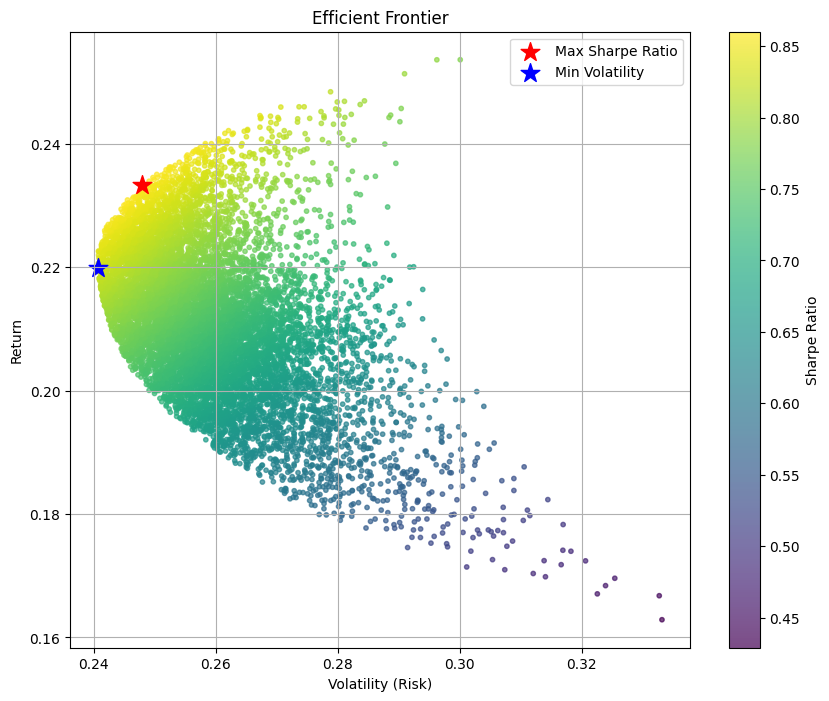

In [31]:
# Extracting results
returns = results[:, 0]
volatilities = results[:, 1]
sharpe_ratios = results[:, 2]

# Plotting Efficient Frontier
plt.figure(figsize=(10, 8))
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap="viridis", marker="o", s=10, alpha=0.7)
plt.colorbar(label="Sharpe Ratio")

# Highlight optimal portfolios
plt.scatter(results[max_sharpe_idx, 1], results[max_sharpe_idx, 0], color="r", marker="*", s=200, label='Max Sharpe Ratio')
plt.scatter(results[min_vol_idx, 1], results[min_vol_idx, 0], color='b', marker='*', s=200, label='Min Volatility')

# Labels and title
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.savefig('efficient_frontier.png')
plt.show()

## Visualising Portfolio Allocations

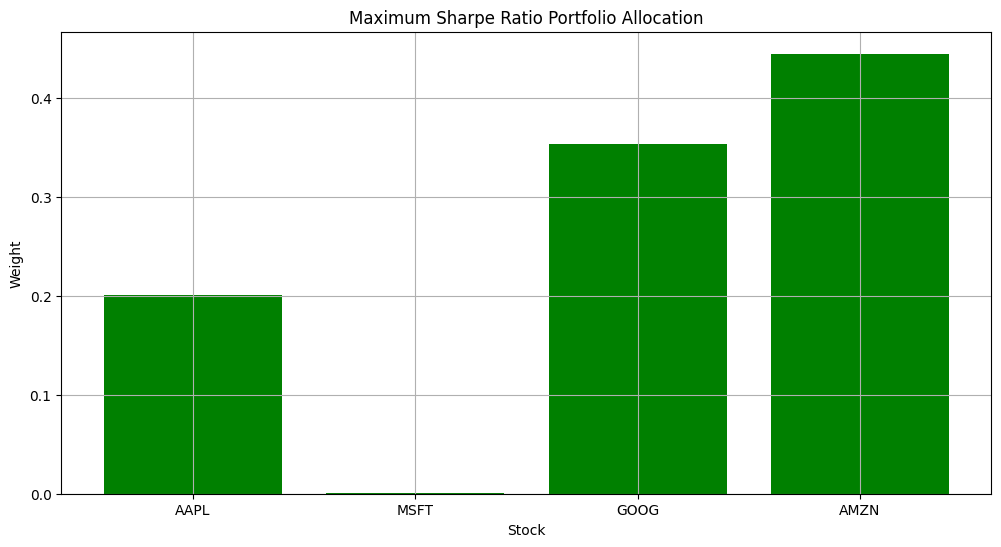

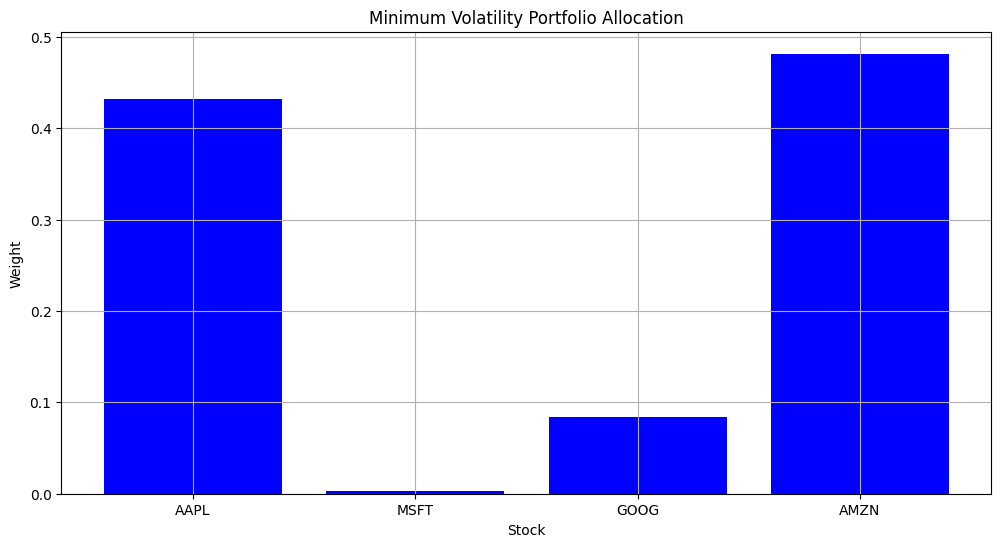

In [30]:
# Converting weights to dataframes for easier visualisation
max_sharpe_df = pd.DataFrame({'Stock': tickers, 'Weight': max_sharpe_weights})
min_vol_df = pd.DataFrame({'Stock': tickers, 'Weight': min_vol_weights})

# Plotting weights for maximum Sharpe Ratio portfolio
plt.figure(figsize=(12, 6))
plt.bar(max_sharpe_df['Stock'], max_sharpe_df['Weight'], color='green')
plt.title('Maximum Sharpe Ratio Portfolio Allocation')
plt.ylabel('Weight')
plt.xlabel('Stock')
plt.grid(True)
plt.savefig('max_sharpe_port_alloc.png')
plt.show()

# Plotting weights for Minimum Volatility Portfolio
plt.figure(figsize=(12, 6))
plt.bar(min_vol_df['Stock'], min_vol_df['Weight'], color='blue')
plt.title('Minimum Volatility Portfolio Allocation')
plt.ylabel('Weight')
plt.xlabel('Stock')
plt.grid(True)
plt.savefig('min_vol_port_alloc.png')
plt.show()

## Summary

In [27]:
# Maximum Sharpe Ratio Portfolio
max_sharpe_return = results[max_sharpe_idx, 0]
max_sharpe_volatility = results[max_sharpe_idx, 1]
max_sharpe_ratio = results[max_sharpe_idx, 2]

print("Maximum Sharpe Ratio Portfolio:")
print(f"Expected Return: {max_sharpe_return:.2%}")
print(f"Volatility (Risk): {max_sharpe_volatility:.2%}")
print(f"Sharpe Ratio: {max_sharpe_ratio:.2f}\n")

# Minimum Volatility Portfolio
min_vol_return = results[min_vol_idx, 0]
min_vol_volatility = results[min_vol_idx, 1]
min_vol_ratio = results[min_vol_idx, 2]  # Sharpe ratio of minimum volatility portfolio

print("Minimum Volatility Portfolio:")
print(f"Expected Return: {min_vol_return:.2%}")
print(f"Volatility (Risk): {min_vol_volatility:.2%}")
print(f"Sharpe Ratio: {min_vol_ratio:.2f}")

Maximum Sharpe Ratio Portfolio:
Expected Return: 23.32%
Volatility (Risk): 24.79%
Sharpe Ratio: 0.86

Minimum Volatility Portfolio:
Expected Return: 21.99%
Volatility (Risk): 24.07%
Sharpe Ratio: 0.83
